In [1]:
from segmenter_api.utils.file import get_project_dir

%cd {get_project_dir()}
print(get_project_dir())

/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api
/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api


In [15]:
from pathlib import Path

from PIL import Image

from segmenter_api.di import resolve
from segmenter_api.domain.factory.detector_factory import (
    DetectorType,
)
from segmenter_api.domain.factory.segmenter_factory import (
    SegmenterType,
)
from segmenter_api.usecase.service.text2segment import (
    Text2SegmentInput,
    Text2SegmentUsecase,
)
from segmenter_api.utils.image import draw_bbox

In [3]:
image_path = Path("data/multiple_products.png")
image = Image.open(image_path)

In [4]:
text2segment_usecase = resolve(Text2SegmentUsecase)

In [31]:
text2segment_output = text2segment_usecase.text2segment(
    text2segment_input=Text2SegmentInput(
        texts=["left cosmetic", "center cosmetic", "right cosmetic"],
        image=image,
        detector_type=DetectorType.FLORENCE2,
        segmenter_type=SegmenterType.SAM2,
    )
)

{"severity": "INFO", "timestamp": "2025-04-15_10:05:37", "message": "関数Text2SegmentUsecase.text2segmentが開始"}


INFO:segmenter_api.utils.time:関数Text2SegmentUsecase.text2segmentが開始


{"severity": "INFO", "timestamp": "2025-04-15_10:05:37", "message": "関数Florence2Detector.text2bboxが開始"}


INFO:segmenter_api.utils.time:関数Florence2Detector.text2bboxが開始


{"severity": "INFO", "timestamp": "2025-04-15_10:05:38", "message": "関数Florence2Detector.text2bboxは0.4343secで処理を完了"}


INFO:segmenter_api.utils.time:関数Florence2Detector.text2bboxは0.4343secで処理を完了


{"severity": "INFO", "timestamp": "2025-04-15_10:05:38", "message": "関数SAM2.bbox2segmentが開始"}


INFO:segmenter_api.utils.time:関数SAM2.bbox2segmentが開始


{"severity": "INFO", "timestamp": "2025-04-15_10:05:38", "message": "関数SAM2.bbox2segmentは0.1047secで処理を完了"}


INFO:segmenter_api.utils.time:関数SAM2.bbox2segmentは0.1047secで処理を完了


{"severity": "INFO", "timestamp": "2025-04-15_10:05:38", "message": "関数Text2SegmentUsecase.text2segmentは0.5443secで処理を完了"}


INFO:segmenter_api.utils.time:関数Text2SegmentUsecase.text2segmentは0.5443secで処理を完了


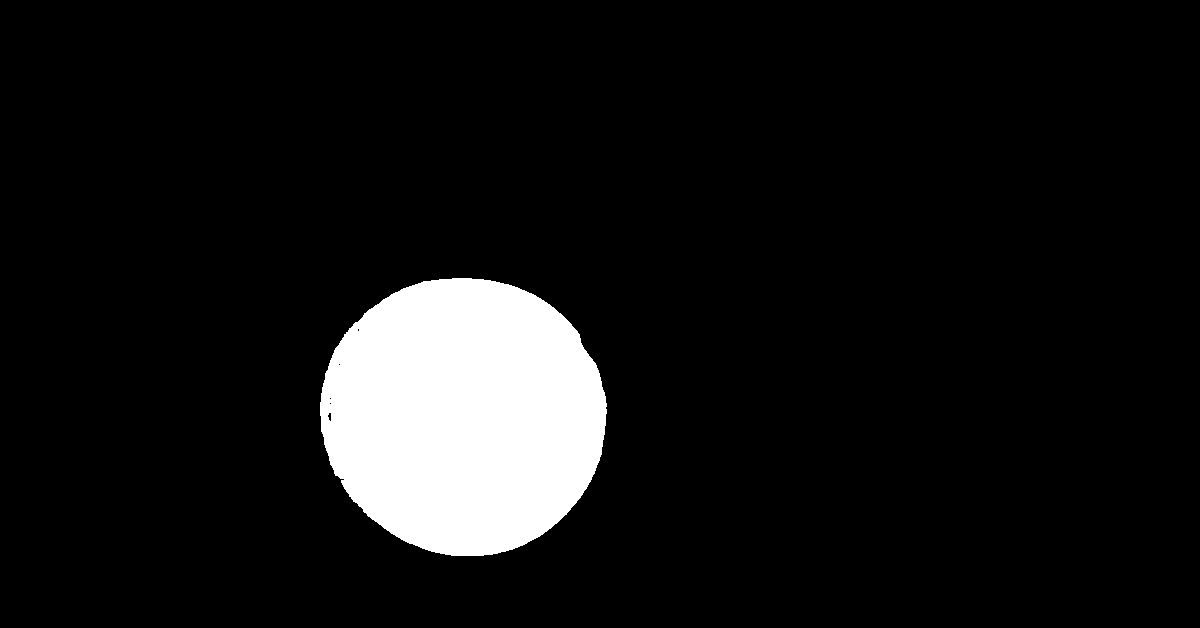

In [32]:
text2segment_output.masks[0]

In [35]:
text2segment_output

Text2SegmentOutput(masks=[<PIL.Image.Image image mode=L size=1200x628 at 0x7FC5FAAC55D0>, <PIL.Image.Image image mode=L size=1200x628 at 0x7FC5D8580A10>, <PIL.Image.Image image mode=L size=1200x628 at 0x7FC5D87D7450>], text2bbox_output=Text2BboxOutput(bboxes=[[315.0, 272.8659973144531, 610.2000122070312, 559.2340087890625], [315.0, 273.4940185546875, 610.2000122070312, 559.8619995117188], [315.0, 273.4940185546875, 610.2000122070312, 559.8619995117188]]), bbox2segment_output=Bbox2SegmentOutput(masks=[<PIL.Image.Image image mode=L size=1200x628 at 0x7FC5FAAC55D0>, <PIL.Image.Image image mode=L size=1200x628 at 0x7FC5D8580A10>, <PIL.Image.Image image mode=L size=1200x628 at 0x7FC5D87D7450>]))

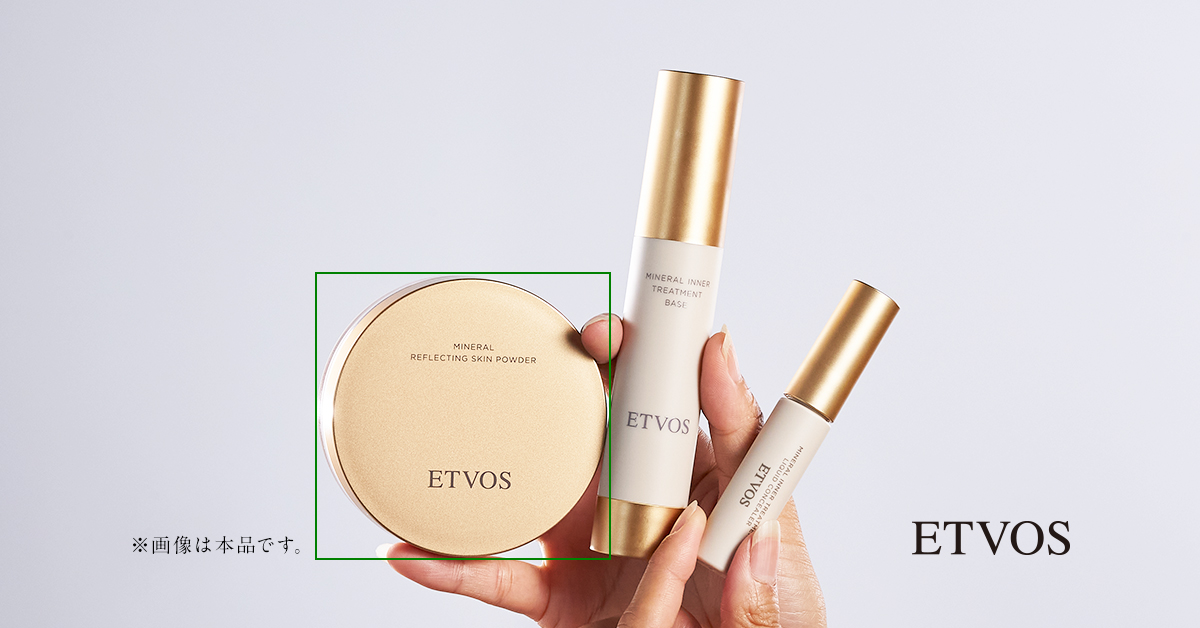

In [39]:
draw_bbox(image, text2segment_output.text2bbox_output.bboxes[0])


In [17]:
text2segment_output

Text2SegmentOutput(masks=[<PIL.Image.Image image mode=L size=1200x628 at 0x7FC5FC1BA0D0>], text2bbox_output=Text2BboxOutput(bboxes=[[587.4000244140625, 66.2540054321289, 748.2000122070312, 561.7460327148438]]), bbox2segment_output=Bbox2SegmentOutput(masks=[<PIL.Image.Image image mode=L size=1200x628 at 0x7FC5FC1BA0D0>]))